# Дополнительные техники классификации.
# Урок 1. Boosting.

Ранее мы уже упоминали, что существует такое понятие как *ансамбли алгоритмов* - метод, использующий одновременно несколько обучающих алгоритмов для получения лучшего результата по сравнению с результатами каждого из алгоритмов в отдельности. Этот метод базируется на интуитивном соображении, пришедшем из статистики, согласно которому усреднение результатов наблюдений может дать более устойчивую и надежную оценку, так как ослабляет влияние различных флуктуаций в отдельных измерениях.

Большинство приемов в ансамблировании направлено на то, чтобы ансамбль был достаточно разнообразным, тогда ошибки одних алгоритмов будут компенсироваться корректной работой других.

Алгоритмы, из которых состоит ансамбль, называются базовыми алгоритмами (base learners), а алгоритм, который комбинирует полученные ответы - мета-алгоритмом (meta-estimator). По сути, при построении ансамбля:

1. повышают качество базовых алгоритмов
2. повышают разнообразие базовых алгоритмов за счет:
    - варьирования обучающей выборки (каждый алгоритм использует различные подвыборки исходной выборки)
    - варьирования признаков (каждый алгоритм использует свой рандомный набор признаков)
    - варьирования моделей (используются различные модели)
    - варьирования в модели (использование различных гиперпараметров в рамках одного алгоритма)

Вообще, существует достаточно много моделей ансамблирования: 
- голосование/усреднение ответов по независимым алгоритмам (например, *случайный лес*)
- кодировка целевых значений и сведение решения задачи к решению нескольких задач (например, каждый класс может кодироваться бинарным кодом, а решение задачи многоклассовой классификации сводиться к решению нескольких задач бинарной классификации - метод *ECOC*)
- построение суммы нескольких алгоритмов, где каждый следующий алгоритм строится с учетом ошибок предыдущих (*бустинг*)
- построение метапризнаков - ответов базовых алгоритмов на выборке, обучение на них мета-алгоритма (*стекинг*)
- однородные ансамбли (например, *нейронные сети*)

Рассмотрим одни из самые популярных методов: **бустинг** и **стекинг**.

### Boosting (Бустинг)

Главная идея бустинга - последовательное построение базовых алгоритмов, каждый из которых обучается, используя информацию об ошибках, сделанных на предыдущем этапе. Т.е. каждый следующий алгоритм мы строим таким образом, чтобы он исправлял ошибки предыдущих и повышал качество всего ансамбля. 

Первый успешный вариант бустинга - **AdaBoost (Adaptive Boosting)**. Основная идея состоит в том, что каждый следующий алгоритм строится, опираясь на объекты, неверно классифицированные предыдущими алгоритмами. Это достигается за счет того, что при построении каждого следующего алгоритма меняются веса объектов: объекты, которые классифицировались неверно, приобретают больший вес, а объекты, которые были определены правильно, - меньший. 

Подробно разбирать этот алгоритм не имеет смысла, так как его вытеснил градиентный бустинг: оказалось, что AdaBoost является его частной вариацией (что будет показано позднее).

Наглядно алгоритм AdaBoost можно представить таким образом: пусть у нас имеются два класса, которые необходимо разделить, а в качестве базовых алгоритмов мы используем деревья решений глубины 1 (т.е. одно дерево может разделить данные только одной прямой линией по горизонтали или вертикали).

![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/AdaBoost_1.png) 

После обучения первого дерева мы получаем такой результат:

![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/AdaBoost_2.png)

Видим, что веса объектов, на которых ошибся первый базовый алгоритм, увеличились, а веса тех, что были классифицированы правильно, уменьшились (на графике это передается с помощью размера точек).

После обучения второго и третьего деревьев соответственно получаем:

![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/AdaBoost_3.png)
![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/AdaBoost_4.png)

После того, как все базовые алгоритмы были обучены, AdaBoost строит финальную модель  путем суммирования произведений веса каждого дерева на его предсказание (т.е. на то, как дерево разделило классы).

![](https://248006.selcdn.ru/public/DS.%20Block%202.%20M9/AdaBoost_5.png)

Как видим, в таком варианте полученное разделение соответствует идеальной классификации.

**GradientBoosting**. Как понятно из названия, основан на понятии градиента: не вдаваясь в математические подробности, можно сказать, что градиент - это вектор, который направлен в сторону наискорейшего возрастания функции. Соответственно, антиградиент направлен в сторону наискорейшего убывания функции. 

Допустим, у нас есть выборка, состоящая из признаков *x* и целевых переменных *y*. Идея градиентного бустинга состоит в том, чтобы уменьшить ошибку предсказания классификатора $\hat{y}$, т.е. уменьшить разность $(y - \hat{y})$, чтобы она была как можно ближе к нулю. Для этой цели используется т.н. функция потерь, т.е. функция, которая характеризует потери при неправильном принятии решений (одну из них - логистическую функцию потерь - мы упоминали в одном из предыдущих уроков). Если обозначить ее как $L$, то искомую наименьшую разность можно переписать в виде $arg min_{\hat{y}}\ L(y, \hat{y})$, а поиск этой наименьшей разности производится самым простым и часто используемым методом - градиентным спуском.

Заметим, что, исходя из использования градиента, функция потерь должна быть дифференцируемой.

Теперь разберемся с тем, какие функции потерь мы можем использовать в задаче классификации. Так как оптимизировать сами метки класса довольно затруднительно, обычно используют пороговые значения, когда $\hat{y} \in \{-1, 1\}$. Наиболее известные функции потерь в классификации:
- Logistic loss или логистическая функция потерь: $L(y, \hat{y}) = log(1 + exp(-y \hat{y}))$ - самая используемая функция потерь в бинарной классификации;
- AdaBoost loss: $L(y, \hat{y}) = exp(-y \hat{y})$. Здесь нужно вспомнить про алгоритм AdaBoost: так получилось, что он эквивалентен методу градиентного бустинга с этой функцией потерь. Эта функция имеет более жесткий штраф по отношению к ошибкам классификации и используется реже.

В качестве базовых алгоритмов здесь обычно используются решающие деревья. При этом решающие деревья выбираются неглубокими: глубина варьируется от 2 до 7. Этого вполне достаточно, чтобы восстановить сложные закономерности с помощью бустинга.

Еще одна эффективная вариация градиентного бустинга на деревьях решений - **XGBoost (eXtreme Gradient Boosting)**. Модель представлена отдельной одноименной библиотекой. По сравнению с классическим градиентным бустингом, в данной реализации больше возможностей для регуляризации базовых решающих деревьев и задачи бустинга в целом. Выделяют три группы параметров:
- общие параметры, отвечающие за выбор базового алгоритма и распараллеливание;
- параметры базового алгоритма решающих деревьев: скорость обучения (чем ниже, тем больше итераций нужно для обучения модели с хорошим качеством), максимальная глубина дерева, минимальное необходимое число объектов в каждом листе, доля выборки для обучения каждого дерева, доля признаков для каждого дерева, коэффициенты перед L1- и L2-регуляризаторами функции потерь;
- параметры задачи обучения: используемая при обучении функция потерь, метрика качества на валидационной выборке, параметр воспрозводимости.

Теперь перейдем к практике. Библиотека sklearn предоставляет нам готовую реализацию алгоритмов AdaBoost и GradientBoosting, а вот XGBoost придется импортировать из другой библиотеки.

In [1]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

Все рассмотренные методы являются композициями алгоритмов. Логично предположить, что их качество будет зависеть от количества базовых алгоритмов, над которыми они строятся. Давайте на примере этих алгоритмов проанализируем, как изменяется качество алгоритма в зависимости от количества деревьев, на которых он построен.

Для демонстрации используем уже преобразованные в одном из предыдущих домашних заданий данные задачи из Kaggle - Titanic.

Вспомним, как они выглядят.

In [1]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('titanic.csv')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


Сразу отделим целевую переменную Survived. На тренировочный и тестовый датасеты данные разделять не будем - сделаем проверку производительности на кросс-валидации.

In [3]:
targets = titanic.Survived
data = titanic.drop(columns='Survived')
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1
1,1,0,38.0,1,0,71.2833,2
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,1
5,3,1,29.0,0,0,8.4583,3
6,1,1,54.0,0,0,51.8625,1
7,3,1,2.0,3,1,21.0750,1
8,3,0,27.0,0,2,11.1333,1
9,2,0,14.0,1,0,30.0708,2


Зададим количество деревьев в алгоритме: 1, а далее от 10 до 100 с шагом 10. В алгоритме за этот гиперпараметр отвечает n_estimtors.

In [0]:
trees = [1] + list(range(10, 100, 10))

Теперь последовательно обучим алгоритмы AdaBoost, GradientBoosting и XGBoost и проверим на трехкратной кросс-валидации, как изменяется точность классификаторов в зависимости от количества базовых алгоритмов. Заодно посмотрим на время обучения каждого из алгоритмов.

In [0]:
%%time

ada_scoring = []
for tree in trees:
    ada = AdaBoostClassifier(n_estimators=tree)
    score = cross_val_score(ada, data, targets, scoring='roc_auc', cv=3)
    ada_scoring.append(score)
ada_scoring = np.asmatrix(ada_scoring)

CPU times: user 2.38 s, sys: 6.71 ms, total: 2.39 s
Wall time: 2.38 s


In [0]:
ada_scoring

matrix([[0.77164222, 0.78587863, 0.7430975 ],
        [0.79997124, 0.85557473, 0.86624005],
        [0.80560349, 0.85092513, 0.88447896],
        [0.79925223, 0.84766561, 0.88562937],
        [0.80236794, 0.84502924, 0.87553926],
        [0.80059438, 0.8420094 , 0.87553926],
        [0.80040265, 0.84112262, 0.88050043],
        [0.80136133, 0.84210526, 0.88203432],
        [0.80299108, 0.84385486, 0.87340619],
        [0.8038539 , 0.84450197, 0.87824753]])

In [0]:
%%time

gbc_scoring = []
for tree in trees:
    gbc = GradientBoostingClassifier(n_estimators=tree)
    score = cross_val_score(gbc, data, targets, scoring='roc_auc', cv=3)
    gbc_scoring.append(score)
gbc_scoring = np.asmatrix(gbc_scoring)

CPU times: user 1.28 s, sys: 3.74 ms, total: 1.28 s
Wall time: 1.28 s


In [0]:
gbc_scoring

matrix([[0.81430352, 0.84991851, 0.87491612],
        [0.81763493, 0.87117726, 0.88677979],
        [0.83158374, 0.87364586, 0.88179465],
        [0.81703576, 0.8781996 , 0.8825616 ],
        [0.81777874, 0.87407727, 0.88186655],
        [0.81451922, 0.87103346, 0.88730707],
        [0.81399195, 0.86930783, 0.88349631],
        [0.81003739, 0.87017065, 0.88117151],
        [0.80982169, 0.87146486, 0.87635414],
        [0.81380021, 0.87192024, 0.87496405]])

In [0]:
%%time

xgb_scoring = []
for tree in trees:
    xgb = XGBClassifier(n_estimators=tree)
    score = cross_val_score(xgb, data, targets, scoring='roc_auc', cv=3)
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

CPU times: user 655 ms, sys: 7.99 ms, total: 663 ms
Wall time: 659 ms


In [0]:
xgb_scoring

matrix([[0.82019941, 0.84713834, 0.87673761],
        [0.81288946, 0.87072189, 0.88711533],
        [0.82842009, 0.87208801, 0.88359218],
        [0.82504074, 0.87206404, 0.88809798],
        [0.82707794, 0.871369  , 0.88613268],
        [0.82616719, 0.87201611, 0.88100374],
        [0.82401016, 0.87053015, 0.88337647],
        [0.82139776, 0.86834915, 0.88311284],
        [0.82264404, 0.86887643, 0.88618062],
        [0.82329115, 0.86856485, 0.88618062]])

На первый взгляд алгоритмы работают практически идентично. Теперь посмотрим на графике, так ли это. Обратите внимание на то, что алгоритм XGBoost работает в 2 раза быстрее, чем GradienBoosting, и почти в 4 раза быстрее, чем AdaBoost.

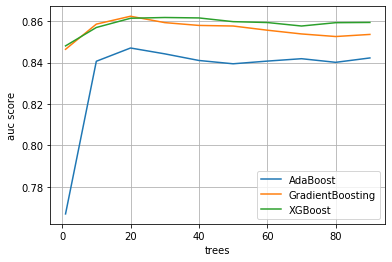

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(trees, ada_scoring.mean(axis=1), label='AdaBoost')
plt.plot(trees, gbc_scoring.mean(axis=1), label='GradientBoosting')
plt.plot(trees, xgb_scoring.mean(axis=1), label='XGBoost')
plt.grid(True)
plt.xlabel('trees')
plt.ylabel('auc score')
plt.legend(loc='lower right')

Видим ожидаемую картину: при одном дереве качество работы алгоритма было ниже, чем с увеличением количества деревьев, однако все модели показывают наиболее высокое качество примерно у отметки в 20 базовых деревьев. Вообще, в бустинге увеличение числа деревьев не всегда приводит к улучшению качества решения на тестовых данных. Число деревьев, при котором качество алгоритма максимально, зависит от темпа обучения: чем меньше темп, тем больше деревьев обычно нужно (отметим, что зависимость нелинейная).

Также, как видно по графику, алгоритм XGBoost работает не только быстрее, но и несколько лучше. Это достигается за счет того, что у него больше преднастроенных гиперпараметров и он лучше оптимизирован.